# Поиск новых признаков

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [170]:
# Загрузка исходных данных
df = pd.read_csv('data/agents2020.csv')
df.describe()

,Наименование ДП,Итого,"Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.","Кол-во раз ПДЗ за 2020 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB",...,"2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB"
count,531.000000,525.000000,531.000000,531.000000,531.000000,5.310000e+02,531.000000,5.310000e+02,5.310000e+02,5.310000e+02,...,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02,5.310000e+02
mean,265.000000,30.400000,26.924670,10.263054,9.167608,6.155193e+06,22.875706,2.581892e+07,3.600098e+07,4.672202e+07,...,4.890154e+09,5.672858e+09,1.395727e+09,1.075368e+09,1.312543e+09,2.561710e+09,1.054666e+09,1.206979e+09,1.988515e+09,2.262094e+09
std,153.430766,48.575431,69.438625,32.093828,31.945180,2.252694e+07,54.068576,1.933860e+08,3.142319e+08,3.658906e+08,...,1.852615e+10,2.113821e+10,9.907869e+09,8.439904e+09,1.193399e+10,2.092975e+10,7.361247e+09,8.196642e+09,1.271200e+10,1.727994e+10
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-4.359633e+09,-4.917329e+10,-1.316305e+11,-1.482809e+10,-1.126443e+09,-9.205369e+08,-2.520849e+10,-5.564792e+09
25%,132.500000,10.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,1.573535e+08,1.916417e+08,4.458599e+04,2.038217e+04,8.356688e+05,1.415924e+06,0.000000e+00,5.796178e+04,1.482803e+06,1.636306e+06
50%,265.000000,20.000000,5.000000,2.673077,0.000000,0.000000e+00,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.755548e+08,5.199580e+08,3.459236e+06,4.535032e+06,6.507006e+06,9.692994e+06,5.703185e+06,8.603822e+06,1.306624e+07,1.458471e+07
75%,397.500000,30.000000,18.000000,6.049462,6.000000,2.739224e+06,21.000000,9.235669e+03,1.019108e+04,2.707006e+04,...,1.709260e+09,1.849968e+09,4.339904e+07,4.402580e+07,5.766210e+07,6.935955e+07,5.960605e+07,7.043376e+07,8.941911e+07,9.462261e+07
max,530.000000,370.000000,489.000000,357.000000,445.000000,2.716331e+08,478.000000,3.126233e+09,6.320583e+09,7.549618e+09,...,2.111127e+11,2.224682e+11,1.237635e+11,1.102105e+11,1.349557e+11,3.983158e+11,1.393573e+11,1.483514e+11,2.091451e+11,3.420850e+11


In [171]:
print(*list(df.columns), sep='\t\t')

Наименование ДП		Факт. 1		Факт. 2		Факт. 3		Факт. 4		Факт. 5		Факт. 6		Факт. 7		Факт. 8		Факт. 9		Факт. 10		Факт. 11		Факт. 12		Факт. 13		Факт. 14		Факт. 15		Факт. 16		Факт. 17		Факт. 18		Факт. 19		Факт. 20		Факт. 21		Факт. 22		Факт. 23		Факт. 24		Факт. 25		Факт. 26		Факт. 27		Факт. 28		Факт. 29		Факт. 30		Факт. 31		Факт. 32		Факт. 33		Факт. 34		Факт. 35		Факт. 36		Факт. 37		Факт. 38		Факт. 39		Факт. 40		Факт. 41		Факт. 42		Факт. 43		Факт. 44		Факт. 45		Факт. 46		Факт. 47		Факт. 48		Факт. 49		Факт. 50		Факт. 51		Факт. 52		Факт. 53		Факт. 54		Факт. 55		Факт. 56		Факт. 57		Факт. 58		Факт. 59		Факт. 60		Итого		Макс. ПДЗ за 2020 год, дней		Сред. ПДЗ за 2020 год, дней		Кол-во просрочек свыше 5-ти дней за 2020 год, шт.		Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.		Кол-во раз ПДЗ за 2020 год, шт.		2016, Нематериальные активы, RUB		2017, Нематериальные активы, RUB		2018, Нематериальные активы, RUB		2019, Нематериальные активы, RUB		2016, Основные средства , RUB		2017, Основные средства ,

In [172]:
# создаю новые прзнаки
years = [2016, 2017, 2018, 2019]
df_new = pd.DataFrame()
df_new['Макс. ПДЗ за 2020 год, дней'] = df['Макс. ПДЗ за 2020 год, дней']

for year in years:
    df_new[f'{year}, Активы, RUB'] = df[f'{year}, Основные средства , RUB'] \
                                        + df[f'{year}, Внеоборотные активы, RUB'] \
                                        + df[f'{year}, Оборотные активы, RUB'] \
                                        + df[f'{year}, Уставный капитал , RUB'] \
                                        + df[f'{year}, Капитал и резервы, RUB'] \
                                        + df[f'{year}, Выручка, RUB'] \
                                        + df[f'{year}, Себестоимость продаж, RUB']
    df_new[f'{year}, Обязательства, RUB'] = df[f'{year}, Дебиторская задолженность, RUB'] \
                                        + df[f'{year}, Заёмные средства (краткосрочные), RUB'] \
                                        + df[f'{year}, Долгосрочные обязательства, RUB'] \
                                        + df[f'{year}, Заёмные средства (краткосрочные), RUB'] \
                                        + df[f'{year}, Кредиторская задолженность, RUB'] \
                                        + df[f'{year}, Краткосрочные обязательства, RUB']
    df_new[f'{year} Активы - обязательства'] = df_new[f'{year}, Активы, RUB'] \
                                               - df_new[f'{year}, Обязательства, RUB'] 
    # Показатели рентабельности
    df_new[f'{year} FIN 01'] = df[f'{year}, Прибыль (убыток) от продажи, RUB'] \
                                                        / (
                                                            df[f'{year}, Себестоимость продаж, RUB'] \
                                                            )
    df_new[f'{year} FIN 02'] = df[f'{year}, Прибыль (убыток) до налогообложения , RUB'] \
                                                        / df[f'{year}, Выручка, RUB']
                                                        
    df_new[f'{year} FIN 03'] = df[f'{year}, Прибыль (убыток) до налогообложения , RUB'] \
                                                    / (
                                                        df[f'{year}, Капитал и резервы, RUB'] \
                                                        + df[f'{year}, Долгосрочные обязательства, RUB']
                                                        )
    df_new[f'{year} FIN 04'] = df[f'{year}, Прибыль (убыток) до налогообложения , RUB'] \
                                                        / df[f'{year}, Себестоимость продаж, RUB']
    df_new[f'{year} FIN 05'] = df[f'{year}, Выручка, RUB'] \
                                                        / df[f'{year}, Капитал и резервы, RUB']
    df_new[f'{year} FIN 06'] = df[f'{year}, Выручка, RUB'] \
                                                        / (
                                                            df[f'{year}, Основные средства , RUB'] \
                                                           + df[f'{year}, Внеоборотные активы, RUB'] \
                                                           + df[f'{year}, Оборотные активы, RUB']
                                                           )
    # Показатели ликвидности и оборачиваемости
    #                                                        )


# df[]+df[]df[]df[]df[]df[]df[]

# Расчитываю корреляцию
df_new_corr =df_new.corr()
# df_new_corr

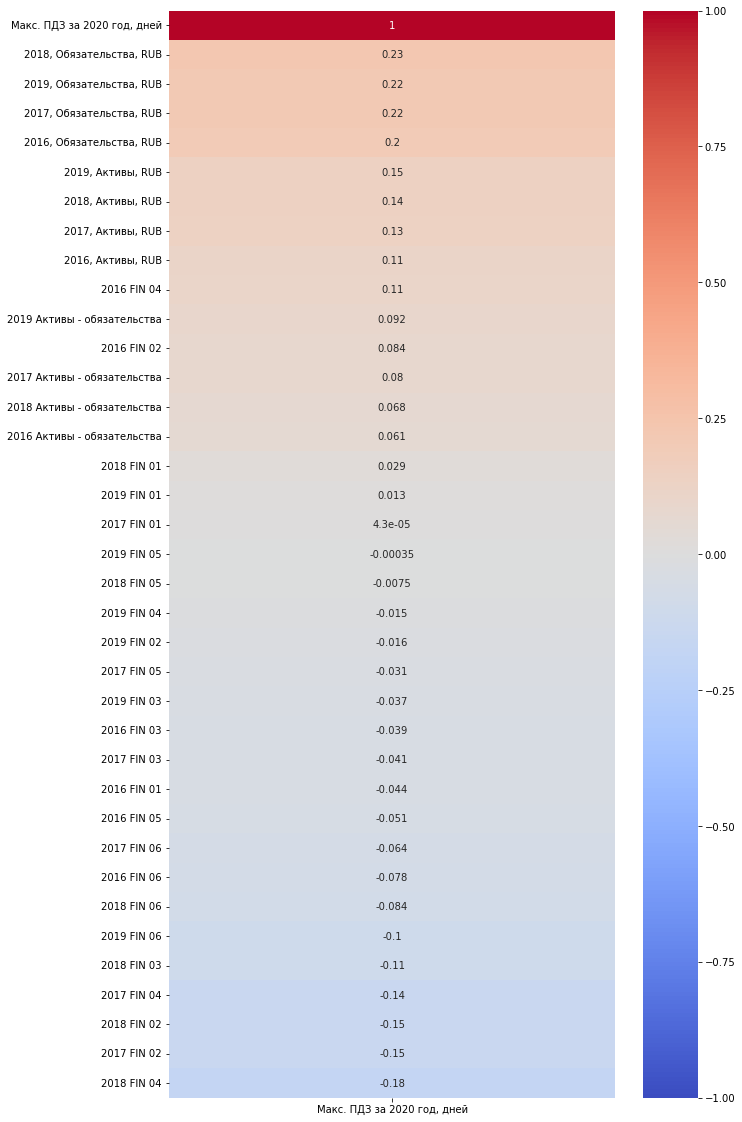

In [173]:
df2 = df_new_corr[['Макс. ПДЗ за 2020 год, дней']].sort_values(by='Макс. ПДЗ за 2020 год, дней', ascending=False)
fig = plt.figure(figsize=(10,20))
heat = sns.heatmap(df2, 
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='coolwarm');

## Пробую создавтаь новые признаки подбором

In [174]:
print(df.columns[67:])

Index(['2016, Нематериальные активы, RUB', '2017, Нематериальные активы, RUB',
       '2018, Нематериальные активы, RUB', '2019, Нематериальные активы, RUB',
       '2016, Основные средства , RUB', '2017, Основные средства , RUB',
       '2018, Основные средства , RUB', '2019, Основные средства , RUB',
       '2016, Внеоборотные активы, RUB', '2017, Внеоборотные активы, RUB',
       '2018, Внеоборотные активы, RUB', '2019, Внеоборотные активы, RUB',
       '2016, Дебиторская задолженность, RUB',
       '2017, Дебиторская задолженность, RUB',
       '2018, Дебиторская задолженность, RUB',
       '2019, Дебиторская задолженность, RUB', '2016, Оборотные активы, RUB',
       '2017, Оборотные активы, RUB', '2018, Оборотные активы, RUB',
       '2019, Оборотные активы, RUB', '2016, Уставный капитал , RUB',
       '2017, Уставный капитал , RUB', '2018, Уставный капитал , RUB',
       '2019, Уставный капитал , RUB', '2016, Капитал и резервы, RUB',
       '2017, Капитал и резервы, RUB', '2018, 

In [175]:
df_columns = list(df.columns)[67:]
df_bruteforce = pd.DataFrame()
df_bruteforce['Макс. ПДЗ за 2020 год, дней'] = df['Макс. ПДЗ за 2020 год, дней']
# for item in itertools.combinations(df_columns, 2):
#     df_bruteforce['_'.join(item)] = df[list(item)].sum(axis=1)
"""
Факт просрочки                50.943396
Просрочка > 30 дней           84.276730
Просрочка от 30 до 60 дней    89.308176
"""

df.fillna(0.001, inplace=True)
df.replace(0, 0.001, inplace=True) 
for item in itertools.permutations(df_columns, 2):
    df_bruteforce['_'.join(item)] = df[item[0]] / df[item[1]]
# df_bruteforce.copy().fillna(0, inplace=True)
df_bruteforce.isna().sum()

/tmp/ipykernel_5973/4015020507.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_bruteforce['_'.join(item)] = df[item[0]] / df[item[1]]


Макс. ПДЗ за 2020 год, дней                                                               0
2016, Нематериальные активы, RUB_2017, Нематериальные активы, RUB                         0
2016, Нематериальные активы, RUB_2018, Нематериальные активы, RUB                         0
2016, Нематериальные активы, RUB_2019, Нематериальные активы, RUB                         0
2016, Нематериальные активы, RUB_2016, Основные средства , RUB                            0
                                                                                         ..
2019, Прибыль (убыток) от продажи, RUB_2018, Прибыль (убыток) до налогообложения , RUB    0
2019, Прибыль (убыток) от продажи, RUB_2019, Прибыль (убыток) до налогообложения , RUB    0
2019, Прибыль (убыток) от продажи, RUB_2016, Прибыль (убыток) от продажи, RUB             0
2019, Прибыль (убыток) от продажи, RUB_2017, Прибыль (убыток) от продажи, RUB             0
2019, Прибыль (убыток) от продажи, RUB_2018, Прибыль (убыток) от продажи, RUB   

In [176]:
df_bruteforce_corr = df_bruteforce.corr()

In [177]:
mask = df_bruteforce_corr[['Макс. ПДЗ за 2020 год, дней']]
df2 = mask[mask > 0.20].dropna().sort_values(by='Макс. ПДЗ за 2020 год, дней', ascending=False)
df2.shape[0]
# fig = plt.figure(figsize=(10,20))
# heat = sns.heatmap(df2, 
#             vmin=-1,
#             vmax=1,
#             annot=True,
#             cmap='coolwarm');


110

In [178]:
df2

,"Макс. ПДЗ за 2020 год, дней"
"Макс. ПДЗ за 2020 год, дней",1.000000
"2019, Дебиторская задолженность, RUB_2017, Нематериальные активы, RUB",0.274012
"2019, Оборотные активы, RUB_2019, Нематериальные активы, RUB",0.268681
"2016, Основные средства , RUB_2016, Оборотные активы, RUB",0.260807
"2019, Кредиторская задолженность, RUB_2017, Нематериальные активы, RUB",0.254878
...,...
"2018, Уставный капитал , RUB_2016, Заёмные средства (долгосрочные), RUB",0.202736
"2018, Заёмные средства (долгосрочные), RUB_2019, Заёмные средства (долгосрочные), RUB",0.201724
"2018, Оборотные активы, RUB_2017, Нематериальные активы, RUB",0.201284
"2018, Выручка, RUB_2018, Нематериальные активы, RUB",0.200497


In [179]:
df_bruteforce[df2.index].isna().sum()

Макс. ПДЗ за 2020 год, дней                                                              0
2019, Дебиторская задолженность, RUB_2017, Нематериальные активы, RUB                    0
2019, Оборотные активы, RUB_2019, Нематериальные активы, RUB                             0
2016, Основные средства , RUB_2016, Оборотные активы, RUB                                0
2019, Кредиторская задолженность, RUB_2017, Нематериальные активы, RUB                   0
                                                                                        ..
2018, Уставный капитал , RUB_2016, Заёмные средства (долгосрочные), RUB                  0
2018, Заёмные средства (долгосрочные), RUB_2019, Заёмные средства (долгосрочные), RUB    0
2018, Оборотные активы, RUB_2017, Нематериальные активы, RUB                             0
2018, Выручка, RUB_2018, Нематериальные активы, RUB                                      0
2018, Уставный капитал , RUB_2016, Прибыль (убыток) от продажи, RUB                      0

In [180]:
df_x = df_bruteforce.drop('Макс. ПДЗ за 2020 год, дней', axis=1)
df_y = df_bruteforce['Макс. ПДЗ за 2020 год, дней']

# 1234 - bool=100% day=20
# 90 - bool=100% day=13

random_state = 90
df_train_x = df_x.sample(frac=0.7, random_state=random_state)
df_test_x = df_x[~df_x.index.isin(df_train_x.index)]
df_train_y = df_y.sample(frac=0.7, random_state=random_state)
df_test_y = df_y[~df_y.index.isin(df_train_y.index)]

# df_train, df_test = df.random_split([0.9,0.1],random_state=1234)
print(f' Всего данных {df.shape[0]},\n \
Обучающая выборка X {df_train_x.shape},\n \
Тестовая выборка X {df_test_x.shape}, \n \
Обучающая выборка Y {df_train_y.shape},\n \
Тестовая выборка Y {df_test_y.shape}')

 Всего данных 531,
 Обучающая выборка X (372, 4032),
 Тестовая выборка X (159, 4032), 
 Обучающая выборка Y (372,),
 Тестовая выборка Y (159,)


In [181]:
model = XGBClassifier()
model.fit(df_train_x, df_train_y)

/home/alexey/anaconda3/envs/SkillFactory/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:26:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [182]:
# make predictions for test data
y_pred = model.predict(df_test_x)
predictions = [round(value) for value in y_pred]

In [183]:
# evaluate predictions
accuracy = accuracy_score(df_test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 22.64%


In [184]:
df_rez = pd.DataFrame(df_test_y)
df_rez['Макс. ПДЗ за 2020 год, дней_bool'] = df_rez['Макс. ПДЗ за 2020 год, дней'] > 0
df_rez['pred_y'] = y_pred
df_rez['pred_y_bool'] = df_rez['pred_y'] > 0
df_rez['Ошибка дней'] = (df_rez['pred_y'] - df_rez['Макс. ПДЗ за 2020 год, дней']).abs()
df_rez['acc_bool'] = df_rez['Макс. ПДЗ за 2020 год, дней_bool'] == df_rez['pred_y_bool']

print(f'Верность предсказания факта просрочки {100 / df_rez.shape[0] * df_rez["acc_bool"].sum()}%')
print(f'Средняя ошибка предсказания {int(df_rez["Ошибка дней"].mean())} дней.')
df_rez

Верность предсказания факта просрочки 49.685534591194966%
Средняя ошибка предсказания 23 дней.


,"Макс. ПДЗ за 2020 год, дней","Макс. ПДЗ за 2020 год, дней_bool",pred_y,pred_y_bool,Ошибка дней,acc_bool
0,10,True,0,False,10,False
2,6,True,3,True,3,True
3,8,True,1,True,7,True
5,21,True,12,True,9,True
14,0,False,0,False,0,True
...,...,...,...,...,...,...
514,20,True,0,False,20,False
517,6,True,0,False,6,False
518,2,True,0,False,2,False
525,0,False,0,False,0,True


### Качество прогнозов по категориям
- факт просрочки;
- просрочку более 30 дней;
- просрочку в диапазоне от 60 до 90 дней?

In [185]:
df_data_perd3 = pd.DataFrame()
df_data_perd3['Факт просрочки'] = df_rez['Макс. ПДЗ за 2020 год, дней'] > 0.1
df_data_perd3['Просрочка > 30 дней'] = df_rez['Макс. ПДЗ за 2020 год, дней'] > 30
df_data_perd3['Просрочка от 30 до 60 дней'] = ((df_rez['Макс. ПДЗ за 2020 год, дней'] >= 30) 
                                            & (df_rez['Макс. ПДЗ за 2020 год, дней'] <= 60))
df_pred_perd3 = pd.DataFrame()
df_pred_perd3['Факт просрочки'] = df_rez['pred_y'] > 0.1
df_pred_perd3['Просрочка > 30 дней'] = df_rez['pred_y'] > 30
df_pred_perd3['Просрочка от 30 до 60 дней'] = ((df_rez['pred_y'] >= 30) 
                                            & (df_rez['pred_y'] <= 60))
print('Точность предсказания:')
100/df_rez.shape[0] * (df_data_perd3 == df_pred_perd3).sum()

Точность предсказания:


Факт просрочки                49.685535
Просрочка > 30 дней           85.534591
Просрочка от 30 до 60 дней    93.081761
dtype: float64

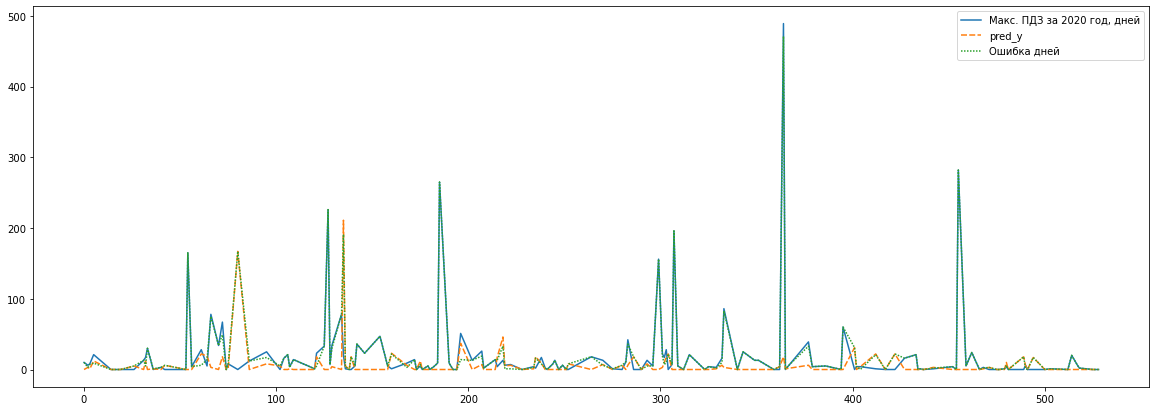

In [186]:
fig, ax = plt.subplots(figsize=(20,7))
# ax.set(yscale="log") #xscale="log", 
sns.lineplot(data=df_rez[['Макс. ПДЗ за 2020 год, дней',
                         'pred_y',
                         'Ошибка дней']],
            # x=df_rez.index,
            # y='Ошибка дней',
            ax=ax);